# Lab8_A5: Yelp Business Classification using Bag-of-Words and tf-idf

Yelp is a crowd-sourced review forum, as well as an American multinational corporation headquartered in San Francisco, California. It develops, hosts and markets Yelp.com and the Yelp mobile app, which publish crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations. The company also trains small businesses in
how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores. The data is open and can be downloaded here https://www.yelp.com/dataset/challenge.

We have prepared a partial dataset from the big Yelp dataset in the __pickle serialization format__ that you can read into a pandas dataframe using ``pd.read_pickle``.


In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as modsel
import sklearn.preprocessing as preproc

### (a)  Load and prep Yelp reviews data

In [2]:
DataPath='D:/Downloads/YelpDataset/'
nightlife_subset = pd.read_pickle('nightlife_subset.pkl')
restaurant_subset = pd.read_pickle('restaurant_subset.pkl')

### (b) combine both datasets

In [3]:
combined = pd.concat([nightlife_subset, restaurant_subset])

In [4]:
combined['target'] = combined.apply(lambda x: 'Nightlife' in x['categories'],
                                    axis=1)

In [5]:
combined

business_id                                        name  \
2203299  lpYFsXFrojiBZ1kbWR2lZw                      Four Peaks Grill & Tap   
482774   KskYqH1Bi7Z_61pH6Om8pg                               Lotus of Siam   
3086879  zFnPRtP7LGvr3sfxvy_dfg                        Revolution Ale House   
512115   gUR2pWQKLPgMEm_R_aI_aw                       Shooters On The Water   
3278073  hmYnzs8-aHbltaOOGDgmbA                          Zipps Sports Grill   
717572   aHACz8VHbBV5Je6q9u7g0Q               Burgers 2 Beer - Concord Twp.   
590714   bXLaGCKzkQcA2hLT-JZQ1w                            J. Sams Wine Bar   
2165889  7sPNbCx7vGAaH7SbNPZ6oA                                Bachi Burger   
621638   DublKfLa9Y0PguCryoDJ-Q                                Cantina 1511   
2048614  iH6heFdMwPXk9GIO6PwUvA                                    Beerhaus   
12861    wKlH90YB5RYFvJ8N3pstVw                              Union Standard   
1064434  B7pLK62P0rRxz25HV4RXFA                               Victory Alley   
2164784  7sPNbCx7vGAaH7SbNPZ6oA                                Bachi Burger   
1315939  rZOzhSA5HP6IdpxuN4v66w       Nikko Japanese Restaurant & Sushi Bar   
3249081  foQZ6guS0l49trURKh7vlA                     Double Barrel Roadhouse   
501133   vjlnj2qGXOQrLVLaCCF_mw               Desert Rose Pizza & Gastropub   
3101497  90bL34o2KEes9pUnCOm7pQ                                  The Gladly   
1862174  DYuOxkW4DtlJsTHdxdXSlg                               Bahama Breeze   
1641551  jQJYvzUFsz9ytI1AzW0dyQ                      Applebee's Grill + Bar   
3431743  pH0BLkL4cbxKzu471VZnuA                      SUSHISAMBA - Las Vegas   
1972070  P7pxQFqr7yBKMMI2J51udw                     Holsteins Shakes & Buns   
1930383  VsPoQeCRYYHQrj9jbiLmtA                       Russell's Pub N Grill   
1383937  l_kefVF1frmC0xRW2YkvUA                               Whisky River    
2471262  GZfz7YiV1fUHjsBj_8ytZA  Anthony's Sports Bar Restaurant & Catering   
1099305  2skQeu3C36VCiB653MIfrw      Bootleggers Modern American Smokehouse   
1774310  xy1McNUocWlt-8DZ7Ifg9A                            Pravda Vodka Bar   
3240924  iIok1p4qnpGAa07xoaXRQA                                 Field Table   
2576812  _T7f2wUgNlJqxsR-cR89SQ    Scaramouche Restaurant Pasta Bar & Grill   
2331196  8tKhimgRiNx74LbYDu9LIw                                  Greek Town   
898173   pHpU8lnnxMuPWRHOysuMIQ                           Salut Kitchen Bar   
...                         ...                                         ...   
510186   tvYID0arhN-shKGUrC1Wsg            Copacabana Brazilian Steak House   
229587   QvltB7RjVOVRBl685azJ5g                            Burntwood Tavern   
2011253  fcyk-PZKRqo4EUJ0vH1aNg                                 Capps Pizza   
1039515  6ZIHxvFTHC1pvAzAS0uLDA                            Lee's Sandwiches   
2066597  spDZkD6cp0JUUm6ghIWHzA                                   Kitchen M   
1733536  GGecutXeoEVlYKoxVo2WPA                        Mixteca Mexican Food   
2740998  QDRFdG8gPPKL7r4yic8j7Q                The Original Burrito Company   
2603889  rbcfYmJtqwIkk17IeOI5Kw                            BARDOT Brasserie   
1023415  J2Am_nJkdicGk2S1DzwuPA                                   Carl's Jr   
1938088  kRgAf6j2y1eR0wOFdzFAuw                                     Firefly   
1231561  vWFhRvHVIJAzIeOX4g_YcA                            Original Tommy's   
3362107  BWWzh28StP6hkMm5L4nCAQ                                   Pita Land   
727051   j-5O-Ehd2eaCHYgmTSfoRw                      Chipotle Mexican Grill   
2312132  EWpRPVSiPxWbdJBgNDNvGw                   Piada Italian Street Food   
2859049  -_TSaVr53qiEGqMkwyEMaQ                Parsley Modern Mediterranean   
97004    zidkKI_N1OPxsiddTOQH_Q                                   Naked BBQ   
852068   q3dJQtwZQrrurNT-1bNKgQ                      Capo's Italian Cuisine   
916914   7iuruLs-q-_RW06IbsBxZw                          Arirang Korean BBQ   
2932256  S599hCA4kJJO3_b6SRFKoA                                   Mich

### (c) Split the dataset into a training and test set

In [6]:
# Split into training and test data sets
training_data, test_data = modsel.train_test_split(combined, 
                                                   train_size=0.7, 
                                                   random_state=123)

D:\Users\wurc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
training_data.shape

(14000, 6)

In [8]:
test_data.shape

(6000, 6)

### (d) Transform the text as BoW (bag-of-words)

In [9]:
# Represent the review text as a bag-of-words 
bow_transform = text.CountVectorizer()
X_tr_bow = bow_transform.fit_transform(training_data['text'])

In [10]:
len(bow_transform.vocabulary_)

29944

In [11]:
X_tr_bow.shape

(14000, 29944)

In [12]:
X_te_bow = bow_transform.transform(test_data['text'])

In [13]:
y_tr = training_data['target']
y_te = test_data['target']

### (e,f) Classify with logistic regression

In [14]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    ## Helper function to train a logistic classifier and score on test data
    m = LogisticRegression(C=_C).fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

In [15]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

Test score with bow features: 0.7143333333333334


### (f) applying normalization to the features

In [16]:
X_tr_l2 = preproc.normalize(X_tr_bow, axis=0)
X_te_l2 = preproc.normalize(X_te_bow, axis=0)

In [17]:
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized')

Test score with l2-normalized features: 0.739


### (g) tf-idf represenation

In [19]:
# Create the tf-idf representation using the bag-of-words matrix
tfidf_trfm = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)

In [20]:
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

In [21]:
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test score with tf-idf features: 0.6796666666666666


### (h) Tune regularization parameters using grid search

In [22]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_, return_train_score=True)
l2_search  = modsel.GridSearchCV(LogisticRegression(), cv=5, return_train_score=True,
                               param_grid=param_grid_)
tfidf_search = modsel.GridSearchCV(LogisticRegression(), cv=5, return_train_score=True,
                                   param_grid=param_grid_)

In [23]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
bow_search.best_score_

0.7187142857142857

In [25]:
l2_search.fit(X_tr_l2, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
l2_search.best_score_

0.7277857142857143

In [27]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
tfidf_search.best_score_

0.7322857142857143

What regularization parameters are best for each method?

In [29]:
bow_search.best_params_

{'C': 0.1}

In [30]:
l2_search.best_params_

{'C': 1.0}

In [31]:
tfidf_search.best_params_

{'C': 0.001}

Let's check one of the grid search outputs to see how it went:

In [32]:
bow_search.cv_results_

{'mean_fit_time': array([0.11030445, 0.23418593, 0.88361163, 1.75465446, 4.03239317,
        7.07900171]),
 'mean_score_time': array([0.        , 0.00352559, 0.00624952, 0.00080218, 0.00180526,
        0.0004014 ]),
 'mean_test_score': array([0.55021429, 0.71242857, 0.71871429, 0.70292857, 0.68057143,
        0.66678571]),
 'mean_train_score': array([0.553125  , 0.73725   , 0.86701786, 0.95925   , 0.995125  ,
        1.        ]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'rank_test_score': array([6, 2, 1, 3, 4, 5]),
 'split0_test_score': array([0.55357143, 0.70642857, 0.71178571, 0.69785714, 0.67892857,
        0.66571429]),
 'split0_train_score': array([0.55517857, 0.73919643, 0.86785714, 0.95883929, 0.99491071,
        1.        ]),
 'split1_

In [33]:
import pickle

In [34]:
results_file = open('tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
pickle.dump(l2_search, results_file, -1)
results_file.close()

In [35]:
pkl_file = open('tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
l2_search = pickle.load(pkl_file)
pkl_file.close()

In [36]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score'],
                               'l2': l2_search.cv_results_['mean_test_score']})
search_results

bow        l2     tfidf
0  0.550214  0.502500  0.715357
1  0.712429  0.502500  0.732286
2  0.718714  0.710643  0.692786
3  0.702929  0.727786  0.673000
4  0.680571  0.716286  0.665357
5  0.666786  0.694643  0.659714

## Plot cross validation results

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

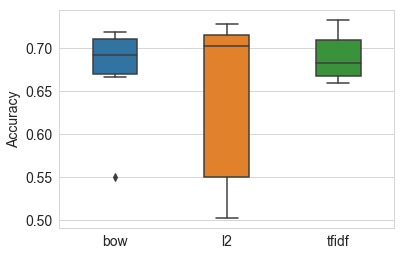

In [38]:
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

In [39]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized', 
                              _C=l2_search.best_params_['C'])
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Test score with bow features: 0.7295
Test score with l2-normalized features: 0.739
Test score with tf-idf features: 0.74


In [40]:
bow_search.cv_results_['mean_test_score']

array([0.55021429, 0.71242857, 0.71871429, 0.70292857, 0.68057143,
       0.66678571])